In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import pickle
sys.path.append('../src')

Plot a single result

In [7]:
train_period_start = 5; train_period_end = 55
file_name = f'start{train_period_start}end{train_period_end}_insampleexcess'
with open('../results/PnL_real_excess/' + file_name + '.pkl', 'rb') as f:
    trading = pickle.load(f)

In [30]:
trading['K=3']['sigma=0.2']['pairwise']


{'class 0': {'raw returns': {'PnL': {'0->1': array([-0.00276496,  0.00803674,  0.0099648 ,  0.01032735,  0.00518569,
            0.01321946,  0.00736052,  0.00342525,  0.01475047, -0.00918403,
           -0.00010556,  0.00305321,  0.00760906,  0.00761123,  0.00355327,
            0.0033416 ,  0.00286281, -0.00998462,  0.01335475,  0.00977948,
           -0.00309666,  0.01566252,  0.01313623,  0.01229627,  0.0045616 ,
            0.00838652,  0.00533573,  0.00885667, -0.02006173,  0.01345143,
            0.00175433,  0.00313924,  0.01524046,  0.00633801, -0.00118304,
            0.00868423,  0.00045729, -0.02111454, -0.00654057, -0.00447206,
            0.00266588, -0.00025356,  0.00531585,  0.00859948,  0.00815805,
            0.01818446,  0.00589326, -0.01703438, -0.00249329,  0.00716905]),
    'average': array([-0.00276496,  0.00803674,  0.0099648 ,  0.01032735,  0.00518569,
            0.01321946,  0.00736052,  0.00342525,  0.01475047, -0.00918403,
           -0.00010556,  0.0030532

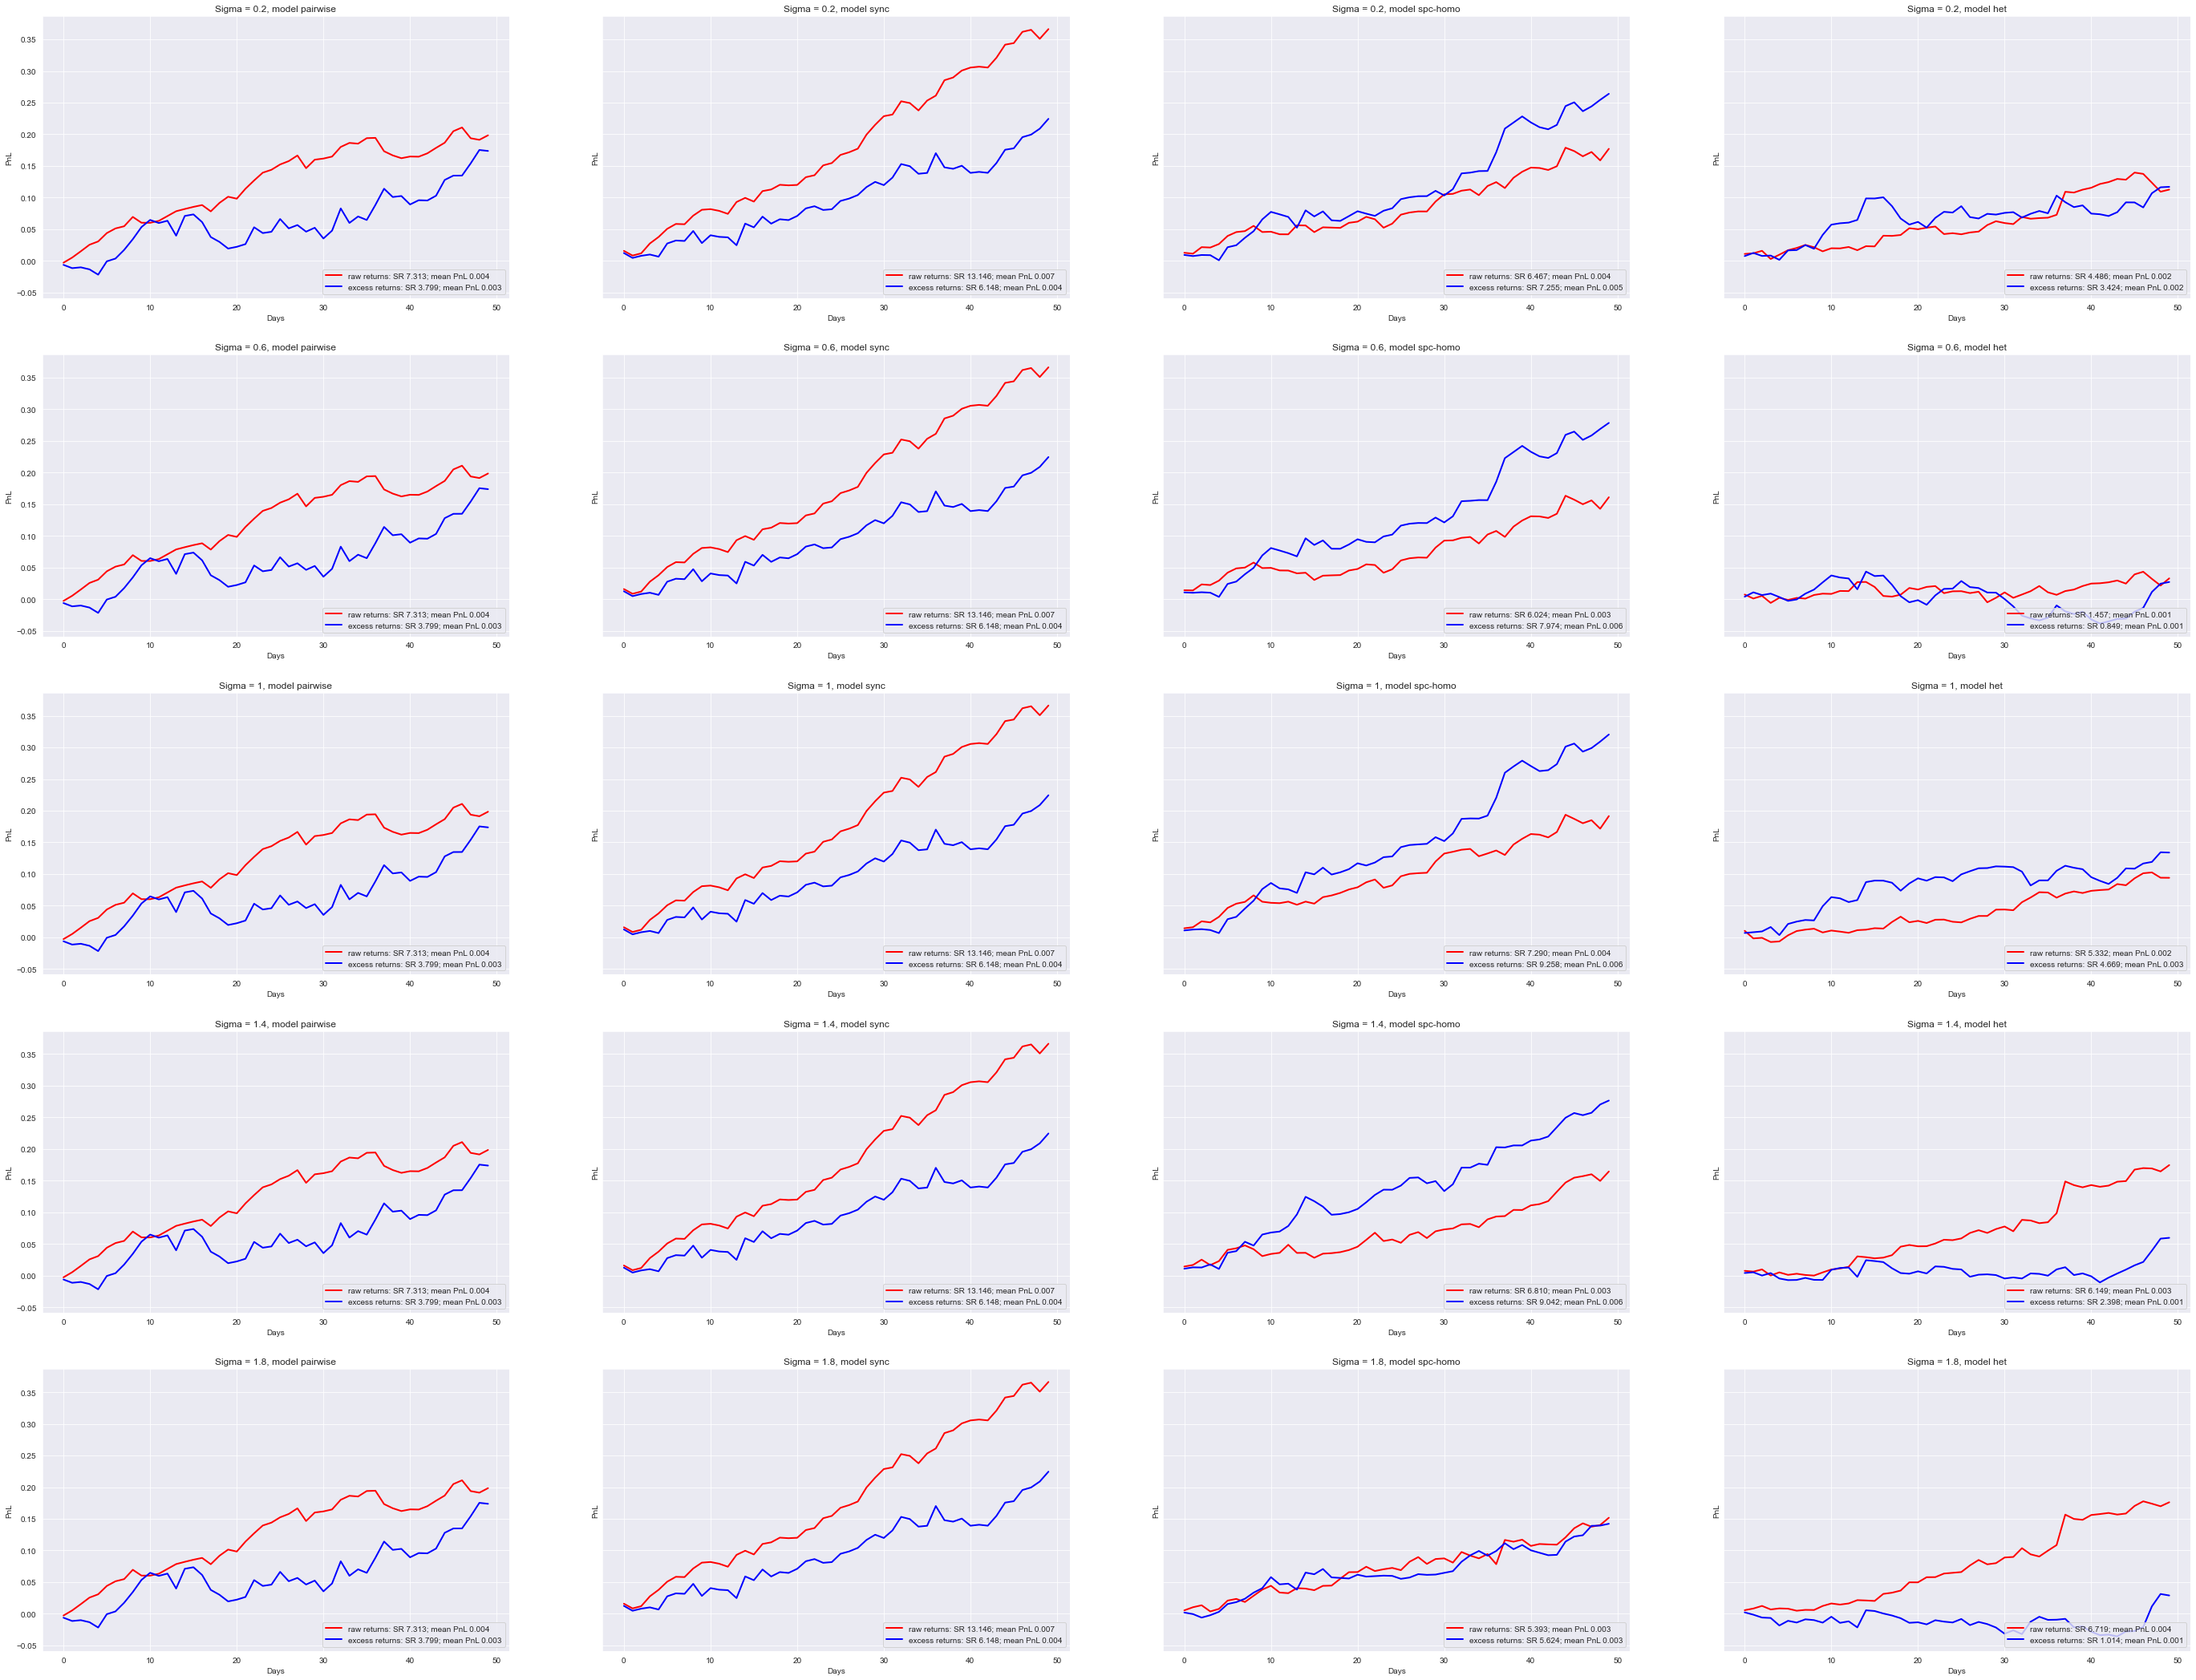

In [31]:
folder_name = f'IS_PnL_maxlag2'
# folder_name = 'test'
# results_save_dir = utils.save_to_folder('../plots/SPC_cluster', folder_name)
K_range = [3]
PnL_sigma_range = np.arange(0.2,2.0,0.4)
models = ['pairwise', 'sync', 'spc-homo', 'het']
for k in K_range:
    fig, axes = plt.subplots(
        len(PnL_sigma_range), len(models),
        figsize=(12*len(models), 7.5*len(PnL_sigma_range)),
        squeeze=False,sharey=True)
    for i, sigma in enumerate(PnL_sigma_range):
        for j, model in enumerate(models):
            ax = axes[i, j]
            ax.set_title(f'Sigma = {sigma:.2g}, model {model}')
            ax.set_xlabel('Days')
            ax.set_ylabel('PnL')
            returns_dict = trading[f'K={k}']\
                [f'sigma={sigma:.2g}'][model]['portfolio average']
            for return_type, values in returns_dict.items():
                # cumsum evaluate the returns of a portfolio of a constant volume
                cum_pnl = np.cumsum(values['PnL']['average'])
                # show the average PnL in red and Bold
                if return_type == 'raw returns':
                    plot_config ={'linestyle': 'solid',
                                  'color': 'red',
                                  'linewidth': 2}
                elif return_type == 'excess returns':
                    plot_config ={'linestyle': 'solid',
                                  'color': 'blue',
                                  'linewidth': 2}
                else:
                    plot_config = {'linestyle': 'dashed'}
                SR = values['annualized SR']['average']
                mean_PnL = np.mean(values['PnL']['average']) # include the first few days when no trading occurs
                ax.plot(np.arange(len(values['PnL']['average'])), cum_pnl, label=f'{return_type}: SR {SR:.3f}; mean PnL {mean_PnL:.3f}', **plot_config)
            ax.legend(loc='lower right')
            ax.grid(visible=True)
            # plt.savefig(results_save_dir + f'/PnL_K={k}')

Plot concatenated results

In [2]:
import os
os.getcwd()

'/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/MRA_python/notebooks'

In [3]:
import pickle
with open('../results/PnL_real_excess/' + file_name + '.pkl', 'rb') as f:
    PnL_SR = pickle.load(f)

NameError: name 'file_name' is not defined

In [95]:
PnL_SR[f'K={k}'][f'sigma={sigma:.2g}'][model]['PnL'].keys()

dict_keys(['raw returns', 'excess returns'])

Recording results in directory: ../plots/SPC_cluster 2023-06-13-17h33min_OS_PnL_maxlag2_excess_pvCLCL_retrain10


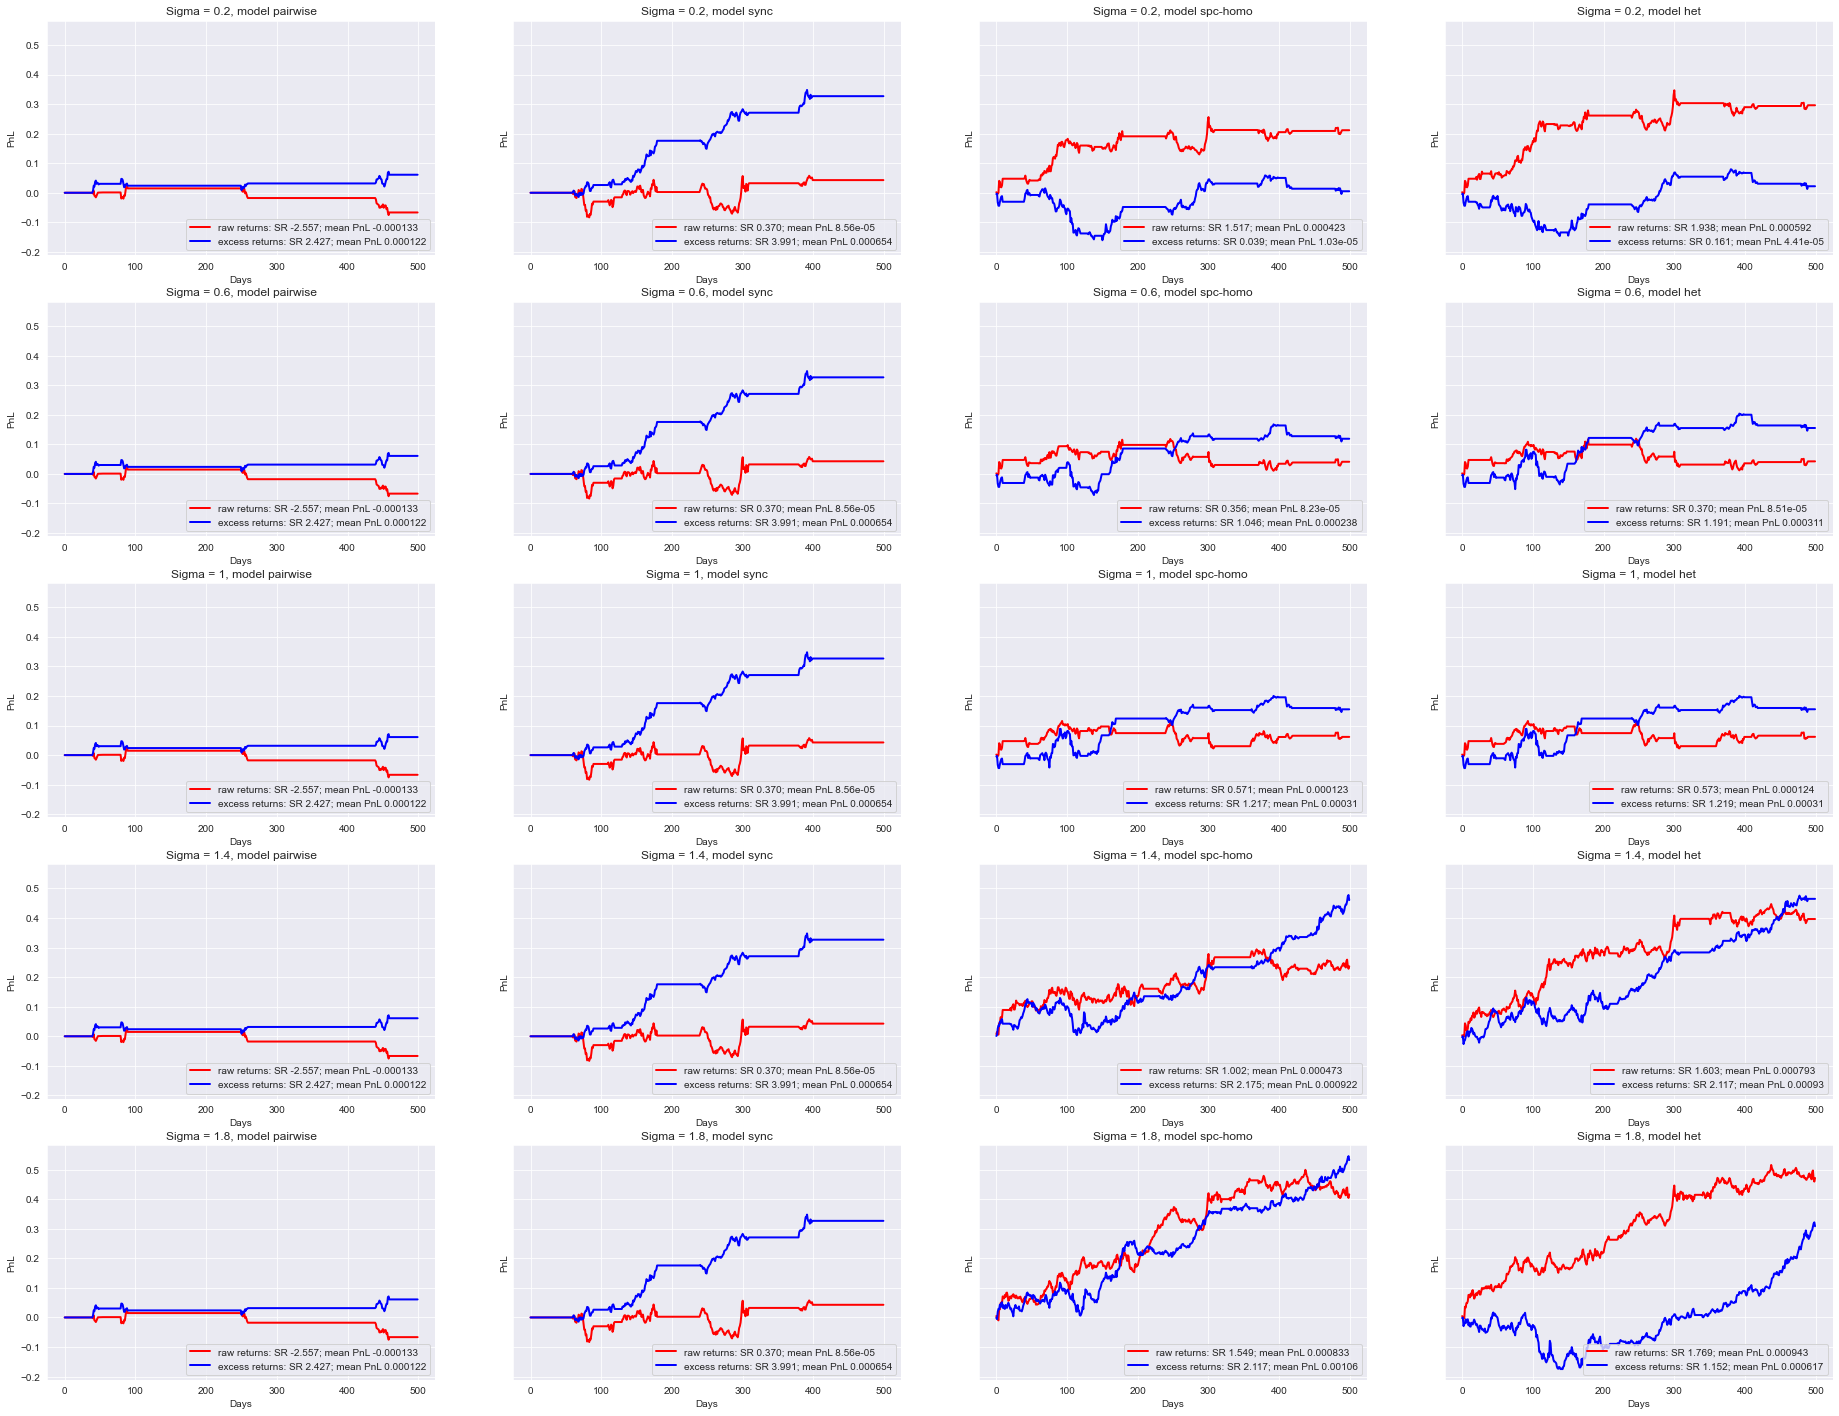

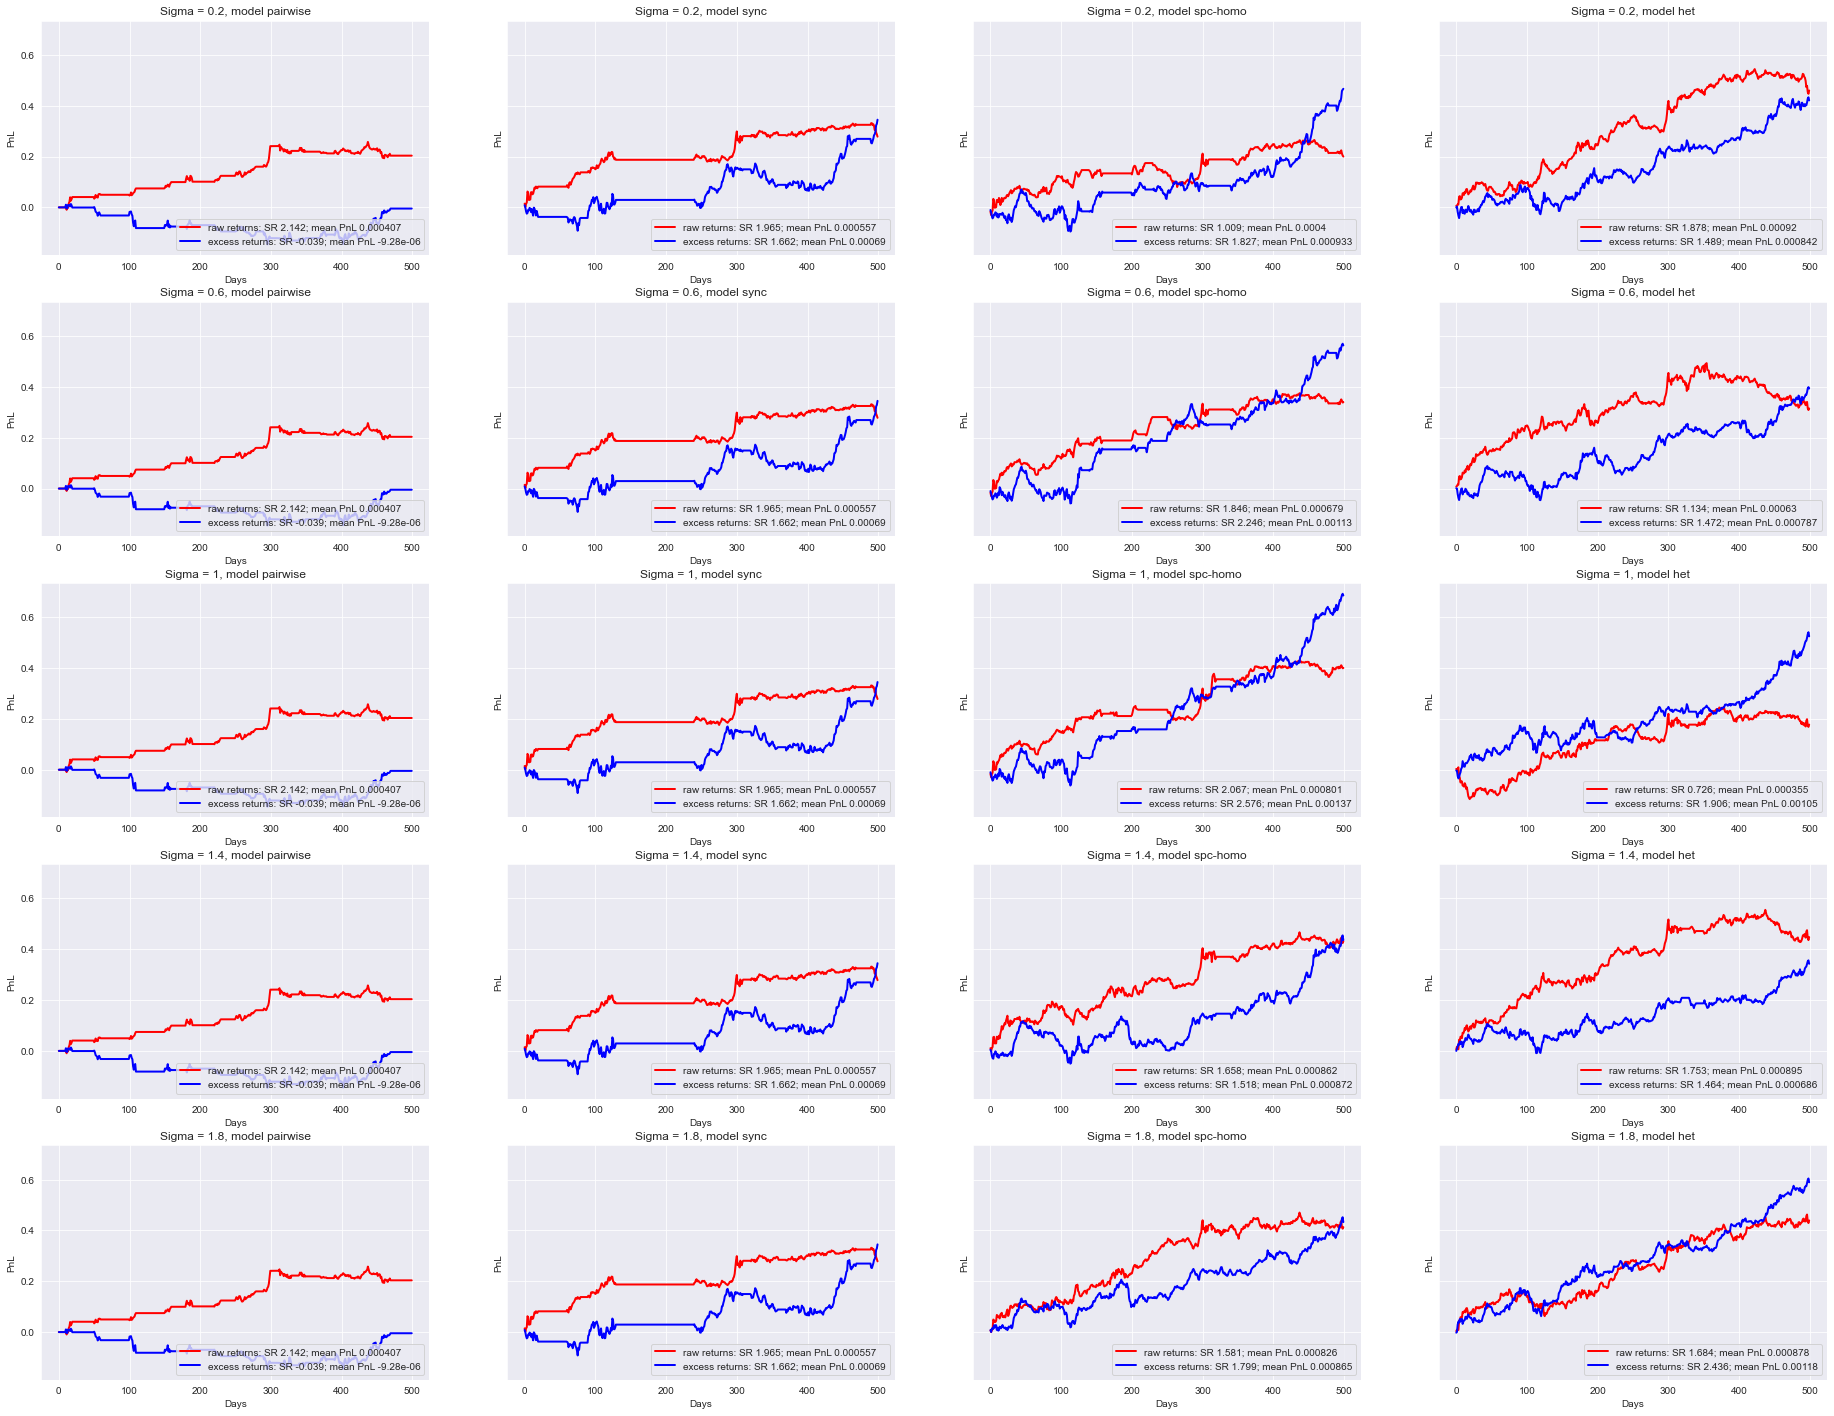

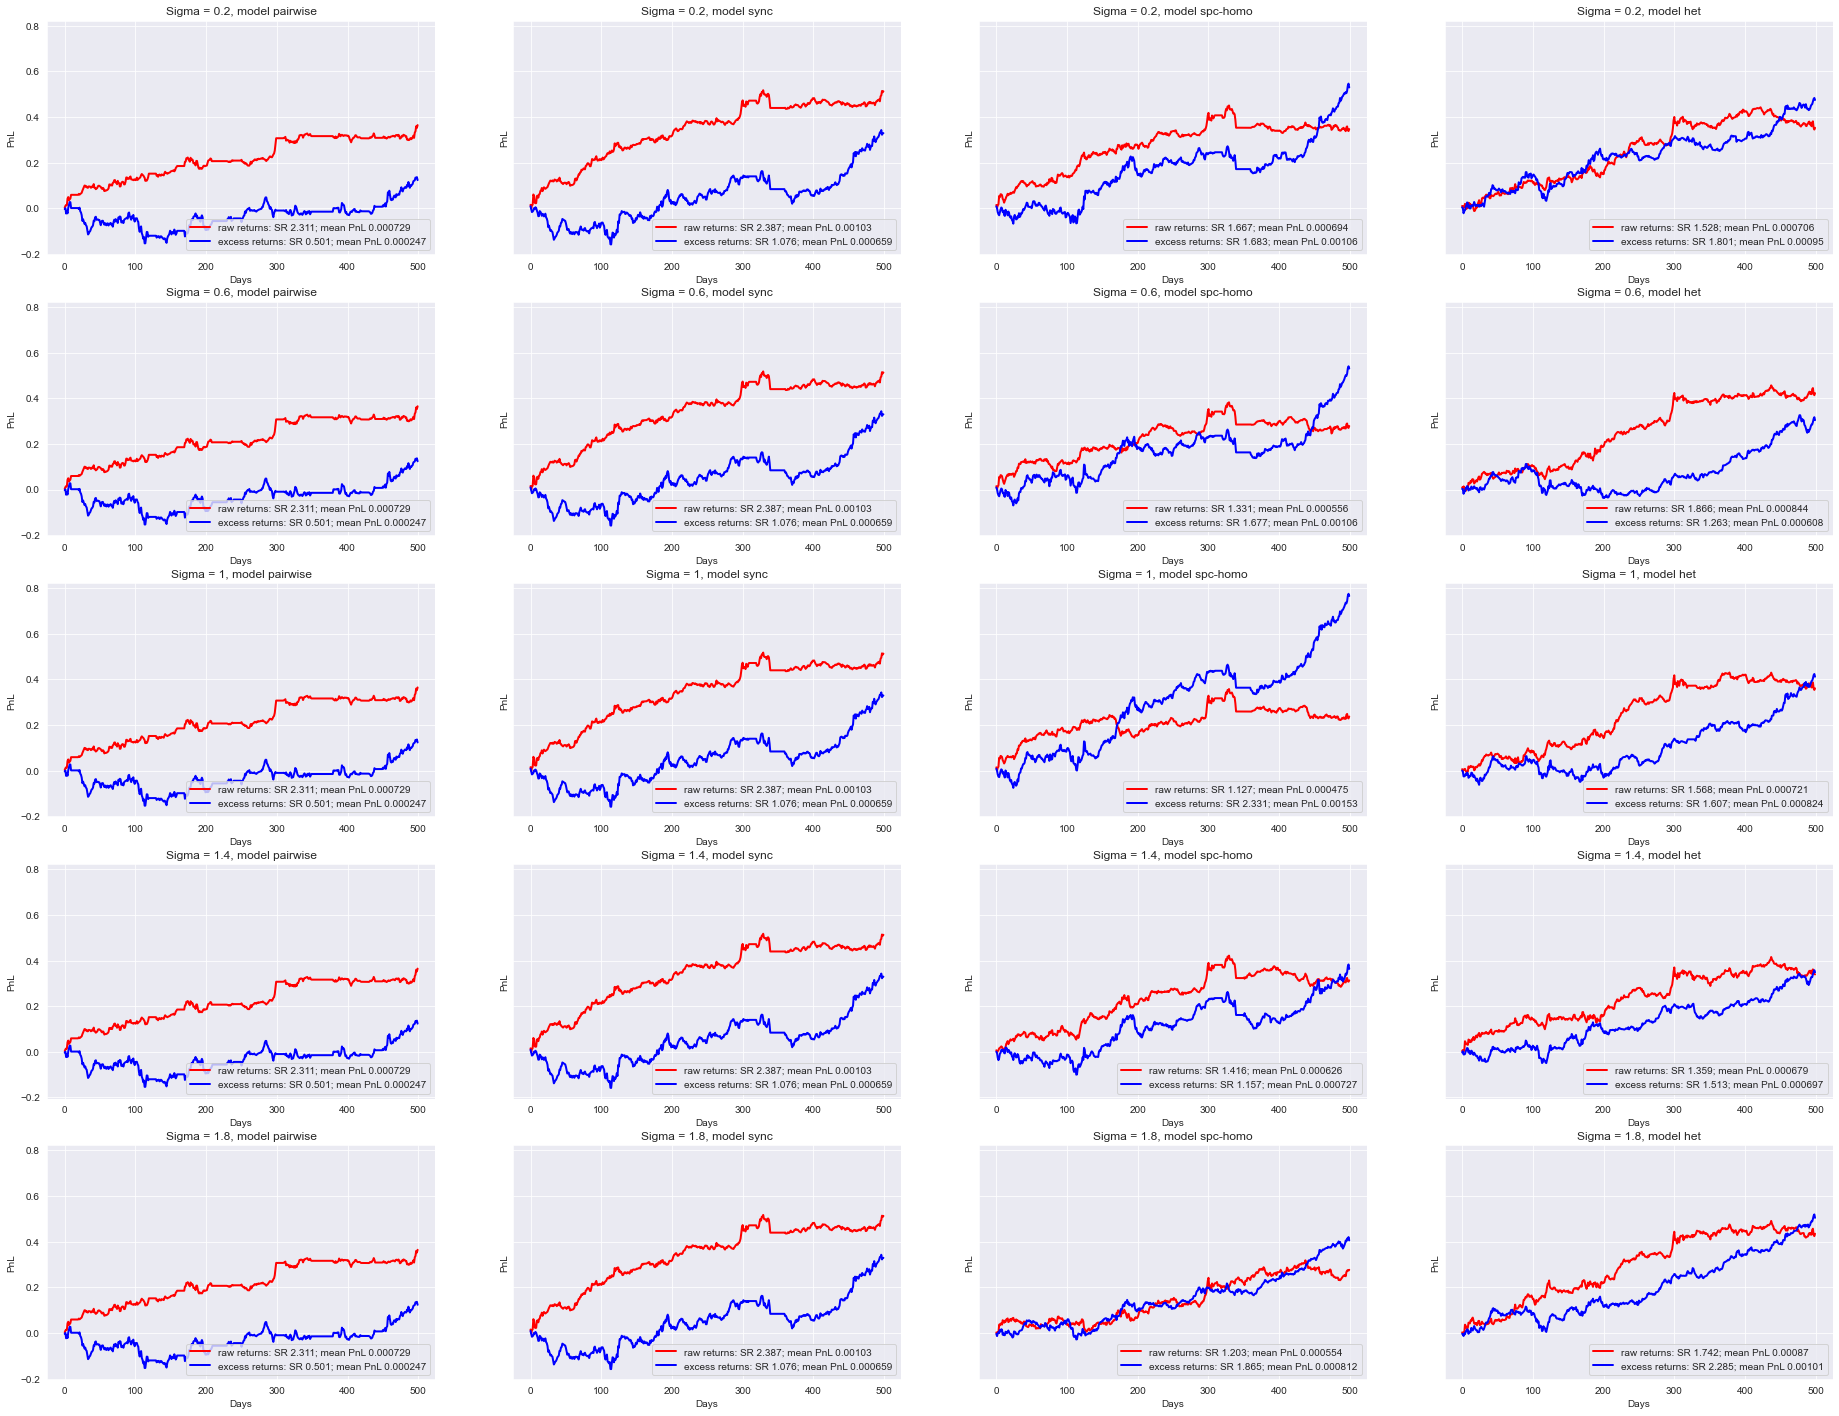

In [4]:
import utils
import pickle
# change folder name accroding to experiment specications
folder_name = f'OS_PnL_maxlag2_excess_pvCLCL_retrain10'
# folder_name = 'test'
results_save_dir = utils.save_to_folder('../plots/SPC_cluster', folder_name)

start = 5; end = 500
retrain_period = 10
signal_length = 50
file_name = f'start{start}end{end}_length{signal_length}_trade{retrain_period}'
with open('../results/PnL_real_excess/' + file_name + '.pkl', 'rb') as f:
    PnL_SR = pickle.load(f)

K_range = [1,2,3]
PnL_sigma_range = np.arange(0.2,2.0,0.4)
models = ['pairwise', 'sync', 'spc-homo', 'het']
for k in K_range:
    fig, axes = plt.subplots(
        len(PnL_sigma_range), len(models),
        figsize=(8*len(models), 5*len(PnL_sigma_range)),
        squeeze=False,sharey=True)
    for i, sigma in enumerate(PnL_sigma_range):
        for j, model in enumerate(models):
            ax = axes[i, j]
            ax.set_title(f'Sigma = {sigma:.2g}, model {model}')
            ax.set_xlabel('Days')
            ax.set_ylabel('PnL')
            returns_dict = PnL_SR[f'K={k}']\
                [f'sigma={sigma:.2g}'][model]
            for return_type, values in returns_dict['PnL'].items():
                # cumsum evaluate the returns of a portfolio of a constant volume
                values[np.isnan(values)]=0
                cum_pnl = np.cumsum(values)
                # show the average PnL in red and Bold
                if return_type == 'raw returns':
                    plot_config ={'linestyle': 'solid',
                                  'color': 'red',
                                  'linewidth': 2}
                elif return_type == 'excess returns':
                    plot_config ={'linestyle': 'solid',
                                  'color': 'blue',
                                  'linewidth': 2}
                else:
                    plot_config = {'linestyle': 'dashed'}
                SR = returns_dict['annualized SR'][return_type]
                mean_PnL = np.mean(values) # include the first few days when no trading occurs
                ax.plot(np.arange(len(values)), cum_pnl, label=f'{return_type}: SR {SR:.3f}; mean PnL {mean_PnL:.3g}', **plot_config)
            ax.legend(loc='lower right')
            ax.grid(visible=True)
        plt.savefig(results_save_dir + f'/PnL_K={k}')

In [67]:

start = 5; end = 500
retrain_period = 10
signal_length = 50
file_name = f'start{start}end{end}_length{signal_length}_trade{retrain_period}'
with open('../results/normalized_real/PnL_real_single/' + file_name + '.pkl', 'rb') as f:
    PnL_SR = pickle.load(f)

with open('../results/normalized_real/PnL_real_single_weighted/' + file_name + '.pkl', 'rb') as f:
    PnL_SR2 = pickle.load(f)


In [97]:

start = 5; end = 55
retrain_period = 10
signal_length = 50
file_name = f'start{start}end{end}trade{retrain_period}excess'
with open('../results/normalized_real_excess/lag_matrices/' + file_name + '.pkl', 'rb') as f:
    lagmat_excess = pickle.load(f)

# with open('../results/normalized_real/PnL_real_single_weighted/' + file_name + '.pkl', 'rb') as f:
#     PnL_SR2 = pickle.load(f)


In [109]:
PnL_SR['K=2']['sigma=0.4']['het']['portfolio average']

{'raw returns': {'PnL': {'0->1': array([ 0.00645867, -0.00214032,  0.00677923,  0.00034881,  0.03119987,
           0.00324294, -0.01426391,  0.00195386,  0.00617988,  0.01713547]),
   'average': array([ 0.00645867, -0.00214032,  0.00677923,  0.00034881,  0.03119987,
           0.00324294, -0.01426391,  0.00195386,  0.00617988,  0.01713547])},
  'annualized SR': {'0->1': 7.946700647549384, 'average': 7.946700647549384}},
 'excess returns': {'PnL': {'0->1': array([ 0.00012467,  0.00178068, -0.02064677, -0.01353719, -0.00952813,
           0.02040694,  0.01215709,  0.01125486,  0.00137688, -0.02438453]),
   'average': array([ 0.00012467,  0.00178068, -0.02064677, -0.01353719, -0.00952813,
           0.02040694,  0.01215709,  0.01125486,  0.00137688, -0.02438453])},
  'annualized SR': {'0->1': -2.3886941781343416,
   'average': -2.3886941781343425}}}

In [84]:
df_test = pd.DataFrame({0:PnL_SR['pairwise']['PnL']['raw returns'], 1:PnL_SR2['pairwise']['PnL']['raw returns']})

KeyError: 'PnL'

In [80]:
abs(np.sum(df_test.iloc[:,0] - df_test.iloc[:,1])) <1e-5


True

### plot results from experiments with optimized K and sigma

Recording results in directory: ../plots/SPC_cluster 2023-06-27-11h59min_OS_PnL_maxlag2_pvCLCL_retrain10_centred


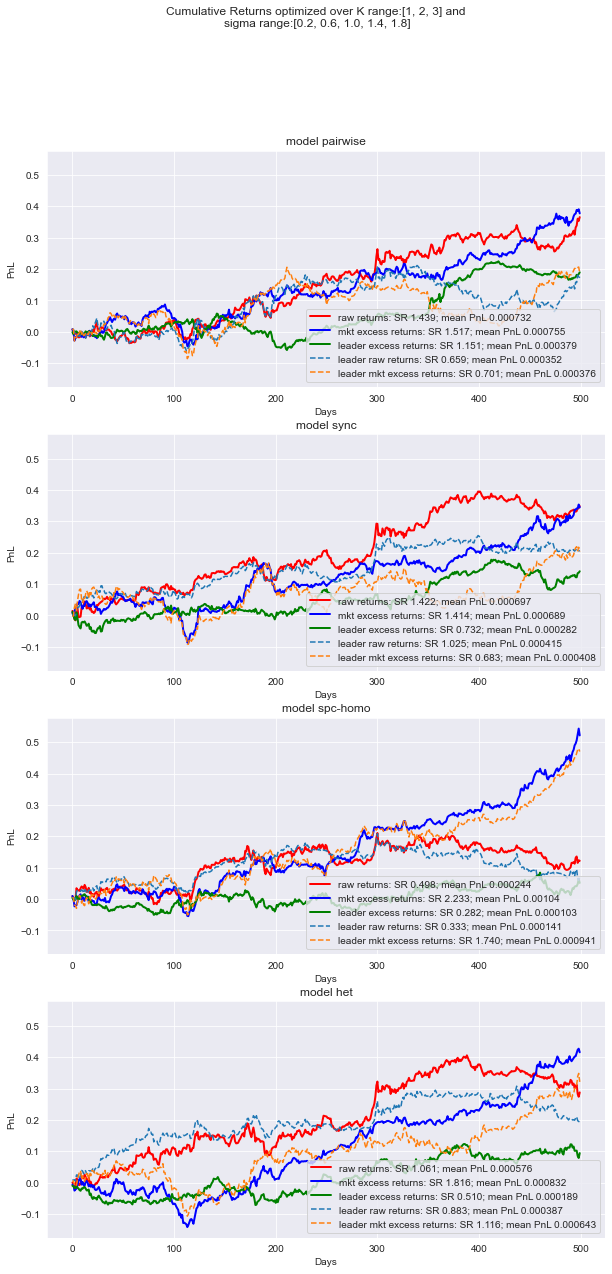

In [94]:
import utils
import pickle

start = 5; end = 500
retrain_period = 10
signal_length = 50
file_name = f'start{start}end{end}_length{signal_length}_trade{retrain_period}'
with open('../results/normalized_real/PnL_real_single_weighted/' + file_name + '.pkl', 'rb') as f:
    PnL_SR = pickle.load(f)

K_range = [1,2,3]
PnL_sigma_range = np.arange(0.2,2.0,0.4)
PnL_sigma_range = [round(PnL_sigma_range[i],1) for i in range(len(PnL_sigma_range))]
models = ['pairwise', 'sync', 'spc-homo', 'het']

fig, axes = plt.subplots(
    len(models),1,
    figsize=(10,5*len(models)),
    squeeze=False,sharey=True)
# 1 plot for each model
for j, model in enumerate(models):
    ax = axes[j,0]
    ax.set_title(f'model {model}')
    ax.set_xlabel('Days')
    ax.set_ylabel('PnL')
    returns_dict = PnL_SR[model]
    for return_type, values in returns_dict['PnL'].items():
        # cumsum evaluate the returns of a portfolio of a constant volume
        values[np.isnan(values)]=0
        cum_pnl = np.cumsum(values)
        # show the average PnL in red and Bold
        if return_type == 'raw returns':
            plot_config ={'linestyle': 'solid',
                          'color': 'red',
                          'linewidth': 2}
        elif return_type == 'mkt excess returns':
            plot_config ={'linestyle': 'solid',
                          'color': 'blue',
                          'linewidth': 2}
        elif return_type == 'leader excess returns':
            plot_config ={'linestyle': 'solid',
                      'color': 'green',
                      'linewidth': 2}
        else:
            plot_config = {'linestyle': 'dashed'}
        SR = returns_dict['annualized SR'][return_type]
        mean_PnL = np.mean(values) # include the first few days when no trading occurs
        ax.plot(np.arange(len(values)), cum_pnl, label=f'{return_type}: SR {SR:.3f}; mean PnL {mean_PnL:.3g}', **plot_config)
    ax.legend(loc='lower right')
    ax.grid(visible=True)
fig.suptitle(f'Cumulative Returns optimized over K range:{list(K_range)} and \nsigma range:{PnL_sigma_range}')
# change folder name accroding to experiment specications
folder_name = f'OS_PnL_maxlag2_pvCLCL_retrain10_centred'
results_save_dir = utils.save_to_folder('../plots/SPC_cluster', folder_name)
plt.savefig(results_save_dir + f'/single_best_k_sigma')

In [82]:
data_path = '../../data/pvCLCL_clean.csv'
df_returns = pd.read_csv(data_path,index_col=0)

<AxesSubplot:>

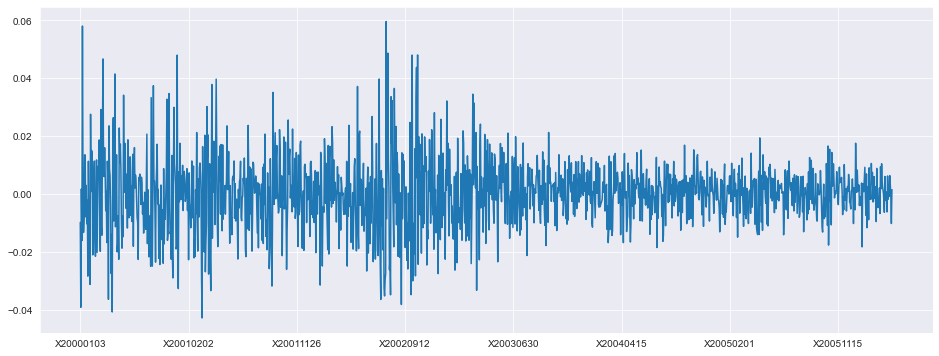

In [86]:
df_returns.loc['SPY'].iloc[:1500].plot(figsize=(16,6))

In [54]:
def annualized_sharpe_ratio(returns):
    return np.mean(returns) / np.std(returns) * np.sqrt(252)
print(f'annualized SR of SPY: {annualized_sharpe_ratio(df_returns.loc["SPY"].iloc[:500]):.3g}')
print(f'mean PnL of SPY: {df_returns.loc["SPY"].iloc[:500].mean():.3g}')

annualized SR of SPY: -0.452
mean PnL of SPY: -0.000409


In [77]:
start = 5; end = 500
retrain_period = 10
signal_length = 50
start_indices = range(start, end, retrain_period)
for model in models:
    print('model: ',model)
    best_K = 0
    best_sigma = 0
    best_mean_PnL = -np.Inf
    for start_index in start_indices:
        end_index = start_index + signal_length
        file_name = f'start{start_index}end{end_index}_insample'
        with open('../results/PnL_real/' + file_name + '.pkl', 'rb') as f:
            PnL_SR = pickle.load(f)
        for k in K_range:
            for sigma in PnL_sigma_range:
                try:
                    mean_PnL = np.mean(PnL_SR[f'K={k}'][f'sigma={sigma:.2g}'][model]['portfolio average']['PnL']['average']) # adjust here for metric to optimize
                    if mean_PnL > best_mean_PnL:
                        best_mean_PnL = mean_PnL
                        best_K=k
                        best_sigma=sigma
                except: continue
        print(f'for train period {start_index} to {end_index}')
        print('best K: ', best_K)
        print('best sigma: ', best_sigma)
        print(f'highest mean PnL: {best_mean_PnL:.3g}')

model:  pairwise
for train period 5 to 55
best K:  3
best sigma:  0.2
highest mean PnL: 0.00397
for train period 15 to 65
best K:  2
best sigma:  0.2
highest mean PnL: 0.00416
for train period 25 to 75
best K:  2
best sigma:  0.2
highest mean PnL: 0.00416
for train period 35 to 85
best K:  2
best sigma:  0.2
highest mean PnL: 0.00416
for train period 45 to 95
best K:  2
best sigma:  0.2
highest mean PnL: 0.00416
for train period 55 to 105
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 65 to 115
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 75 to 125
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 85 to 135
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 95 to 145
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 105 to 155
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train period 115 to 165
best K:  2
best sigma:  0.2
highest mean PnL: 0.00442
for train perio

In [56]:
file_name = f'start{5}end{55}_insample'
with open('../results/PnL_real/' + file_name + '.pkl', 'rb') as f:
    PnL_SR = pickle.load(f)

In [70]:
PnL_SR['K=1']['sigma=0.6']['spc-homo']['portfolio average']['annualized SR']

{'0->1': 6.789149030115108,
 'average': 6.789149030115108,
 'average excess': 3.448810011529263}

In [52]:
import os
folder_name = 'test'
sub_dir = f'../results/{folder_name}/'
os.mkdir(sub_dir)
sub_dir = f'../results/{folder_name}/signal_estimates'
os.mkdir(sub_dir)

In [240]:
 import scipy.io as spio
results_path = '/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/data/results_cell.mat'
results = spio.loadmat(results_path)

In [117]:
print(pnl_sync.keys())

dict_keys(['0->1', '0->2', '1->2', 'average'])


### Some financial metrics

In [157]:
def sharpe_ratio(returns):
    return np.mean(returns)/np.std(returns)*np.sqrt(252)
from scipy import stats
def corr_SP(returns, signals):
    res = stats.spearmanr(returns, signals)
    return res.correlation, res.pvalue
def hit_ratio(returns, signals):
    signals_nonzero = signals[signals != 0]
    returns_nonzero = returns[signals != 0]
    frac = np.mean(np.sign(returns_nonzero)==np.sign(signals_nonzero))
    return frac

def long_ratio(signals):
    signals = signals[signals != 0]
    return np.mean(np.sign(signals)==1)

from sklearn.linear_model import LinearRegression
def linear_regression(returns, signals):
    reg = LinearRegression().fit(signals.reshape(-1,1),returns)
    return reg.score(signals.reshape(-1,1),returns)

In [177]:
data_path = '/Users/caribbeanbluetin/Desktop/Research/MRA_LeadLag/data/pvCLCL_20000103_20201231.csv'
pvCLCL = pd.read_csv(data_path, index_col=0)

In [187]:
pvCLCL.iloc[:,:50].info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, AA to ZTR
Data columns (total 50 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20000103  695 non-null    float64
 1   X20000104  695 non-null    float64
 2   X20000105  695 non-null    float64
 3   X20000106  695 non-null    float64
 4   X20000107  695 non-null    float64
 5   X20000110  695 non-null    float64
 6   X20000111  695 non-null    float64
 7   X20000112  695 non-null    float64
 8   X20000113  695 non-null    float64
 9   X20000114  695 non-null    float64
 10  X20000118  695 non-null    float64
 11  X20000119  695 non-null    float64
 12  X20000120  695 non-null    float64
 13  X20000121  695 non-null    float64
 14  X20000124  695 non-null    float64
 15  X20000125  695 non-null    float64
 16  X20000126  695 non-null    float64
 17  X20000127  695 non-null    float64
 18  X20000128  695 non-null    float64
 19  X20000131  695 non-null    float64
 20  X20000201  695

In [193]:
for index, row in pvCLCL.iterrows():
    for column in pvCLCL.columns:
        if pd.isnull(row[column]):
            print(f"Null value at index {index} and column {column}")

Null value at index AA and column X20161101
Null value at index BF and column X20000607
Null value at index CP and column X20011003
Null value at index EWU and column X20140929
Null value at index FAF and column X20100602
Null value at index GCI and column X20150629
Null value at index IGT and column X20150407
Null value at index IQI and column X20100601
Null value at index KGC and column X20030203
Null value at index KMX and column X20021001
Null value at index NX and column X20080424
Null value at index OIA and column X20100601
Null value at index PHG and column X20000801
Null value at index PNR and column X20121001
Null value at index TSM and column X20000602


In [131]:
for key, returns in pnl_sync.items():
    print(key)
    print('simple returns SR: ',sharpe_ratio(returns))
    log_returns = np.log(returns+1)
    print('log returns SR: ',sharpe_ratio(log_returns))

0->1
simple returns SR:  14.17532673467108
log returns SR:  15.460756076913492
0->2
simple returns SR:  7.400499483855144
log returns SR:  5.433844851302485
1->2
simple returns SR:  10.507688424034741
log returns SR:  12.603951436079537
average
simple returns SR:  14.908477337653238
log returns SR:  16.338664065595577


In [64]:
x = np.arange(9)
x[-3:]

array([6, 7, 8])

In [59]:
# define n nested dictionaries with the same structure
dict1 = {'a': {'x': np.arange(3), 'y': [2,3,4]},
         'b': {'x': [3,4,5], 'y': [np.array([1,2]),np.array([1,2])]}}
dict2 = {'a': {'x': np.arange(3), 'y': [2,3,4]},
         'b': {'x': [3,4,5], 'y': [np.array([2,3]),np.array([3,4])]}}
dict3 = {'a': {'x': np.arange(3), 'y': [2,3,4]},
         'b': {'x': [3,4,5], 'y': [np.array([3,4]),np.array([2,3])]}}

# combine the n dictionaries into a list of dictionaries
dicts = [dict1, dict2, dict3]

def mean_dict(dicts):
    if isinstance(dicts[0], dict):
        # get the keys of the first dictionary
        keys = dicts[0].keys()
        # use a dict comprehension to create a new dictionary
        return {k: mean_dict([d[k] for d in dicts]) for k in keys}
    else:
        return [sum(x)/len(x) for x in zip(*dicts)]

# calculate the mean of the nested dictionary
mean_dict = mean_dict(dicts)

# print the mean dictionary
print(mean_dict)

{'a': {'x': [0.0, 1.0, 2.0], 'y': [2.0, 3.0, 4.0]}, 'b': {'x': [3.0, 4.0, 5.0], 'y': [array([2., 3.]), array([2., 3.])]}}


In [54]:
dicts[0].keys()

dict_keys(['a', 'b'])

In [58]:
l1 = [np.array([1,2]),np.array([1,2])]
l2 = [np.array([2,3]),np.array([3,4])]
l3 = [np.array([3,4]),np.array([2,3])]
[sum(x)/len(x) for x in zip(*[l1,l2,l3])]


[array([3.33333333, 4.33333333]), array([3.33333333, 4.33333333])]

In [2]:
# Function to find the minimum length
# of the subarray whose sum is maximum
def minimumSizeSubarray(arr, N):

    # Stores the starting and the
    # ending index of the resultant
    # subarray
    i, j = 0, N - 1

    # Traverse the array until a
    # non-zero element is encountered
    while (i < N and arr[i] == 0):
        i += 1

    # If the array contains only of 0s
    if (i == N):
        return 1

    # Traverse the array in reverse until
    # a non-zero element is encountered
    while (j >= 0 and arr[j] == 0):
        j -= 1

    # Return the resultant
    # size of the subarray
    return(j - i + 1)

In [3]:
def consecutive_zeros(array):
    result = 0
    streak = 0
    for ele in array:
        if ele == 0:
            streak += 1
        else:
            streak = 0
        result = max(result, streak)
    return result

In [ ]:
def smallest_lag_range(lag_counts):
    if lag_counts.ndim > 1:
        lag_counts = lag_counts.flatten()
    extended_counts = np.append(lag_counts,lag_counts)
    max_consecutive_zeros = consecutive_zeros(extended_counts)
    return len(lag_counts) - max_consecutive_zeros

In [14]:
x = np.arange(9).reshape(3,3)
x[:,:None]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [15]:
from scipy import signal
def fn_linear_corr_lag(x,y):
ccf = signal.correlate(x,y,'full')

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])